# Short pick over EV and Mercedes specifically
# ENJOY!

## Importing and reading the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
ev_data = pd.read_csv('evdataset.csv')

In [3]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           194 non-null    int64  
 1   Make                         194 non-null    object 
 2   link                         194 non-null    object 
 3   City - Cold Weather          194 non-null    int64  
 4   Highway - Cold Weather       194 non-null    int64  
 5   Combined - Cold Weather      194 non-null    int64  
 6   City - Mild Weather          194 non-null    int64  
 7   Highway - Mild Weather       194 non-null    int64  
 8   Combined - Mild Weather      194 non-null    int64  
 9   Acceleration 0 - 100 km/h    194 non-null    float64
 10  Top Speed                    194 non-null    int64  
 11  Electric Range               194 non-null    int64  
 12  Total Power                  194 non-null    int64  
 13  Total Torque        

In [4]:
ev_data

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,1252,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,445,340,390,670,440,540,5.7,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,1534,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,440,320,380,660,415,520,7.9,...,55,570,4261,1809,1568,2771,2300,447,385,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1116,Porsche,https://ev-database.org/car/1116/Porsche-Tayca...,390,290,340,560,370,450,2.8,...,45,980,4963,1966,1378,2900,2870,575,366,4
190,1533,Volkswagen,https://ev-database.org/car/1533/Volkswagen-ID...,440,320,380,660,415,515,7.9,...,55,570,4261,1809,1568,2771,2280,420,385,4
191,1547,Citroen,https://ev-database.org/car/1547/Citroen-e-Ber...,210,140,170,295,170,220,11.7,...,27,310,4753,1921,1849,2975,2440,639,806,7
192,1492,Audi,https://ev-database.org/car/1492/Audi-Q4-Sport...,395,290,340,580,370,460,6.2,...,49,500,4588,1865,1614,2764,2715,575,535,5


### Cleaning some of the columns

In [5]:
ev_data = ev_data.drop(columns = ev_data.iloc[:,2:9], inplace= False)

In [6]:
ev_data.head()

,id,Make,Acceleration 0 - 100 km/h,Top Speed,Electric Range,Total Power,Total Torque,Drive,Battery Capacity,Charge Power,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,7.8,185,390,168,350,Rear,77.4,11.0,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,6.2,160,330,215,520,AWD,69.7,11.0,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,3.2,260,415,500,850,AWD,93.4,11.0,46,1020,4963,1966,1381,2900,2880,575,366,4
3,1252,BMW,5.7,190,470,250,430,Rear,83.9,11.0,54,730,4783,1852,1448,2856,2605,555,470,5
4,1534,Volkswagen,7.9,160,450,150,310,Rear,82.0,11.0,55,570,4261,1809,1568,2771,2300,447,385,5


### Attempt to find cerrelations in the data

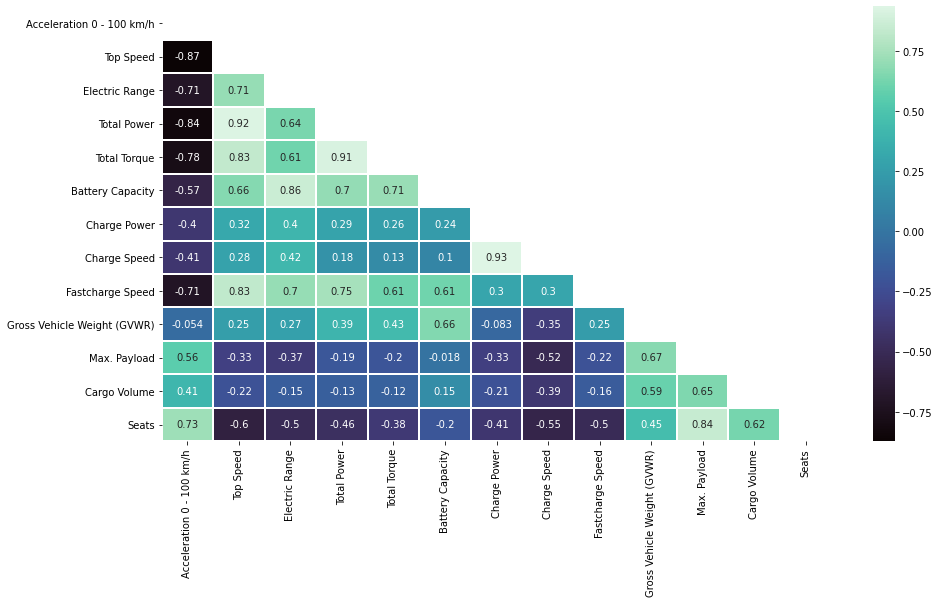

In [7]:
plt.figure(figsize=(15,8))
ev_correlation_matrix = ev_data[['Make','Acceleration 0 - 100 km/h', 'Top Speed', 'Electric Range', 'Total Power', 'Total Torque', 'Battery Capacity', 'Charge Power', 'Charge Speed', 'Fastcharge Speed', 'Gross Vehicle Weight (GVWR)','Max. Payload', 'Cargo Volume','Seats']].corr()
matrix = np.triu(ev_correlation_matrix)
sns.heatmap(data=ev_correlation_matrix ,cmap='mako', annot=True, mask=matrix,linewidths=2)
plt.show()

#### what happens in certian brands in term of Battery Capacity by numbers of cars?

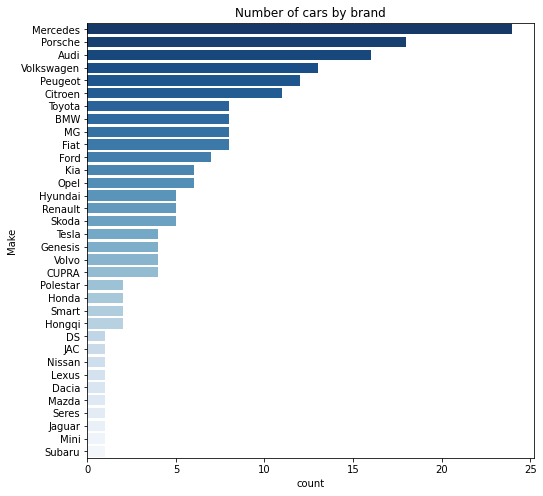

In [8]:
plt.figure(figsize=(8,8))
plt.title("Number of cars by brand")
sns.countplot(y="Make", 
              data=ev_data,
              label="number of cars by brand",
              palette='Blues_r',
              order=ev_data['Make'].value_counts().index)
plt.show()

## Mercedes Overview

In [9]:
ev_Mercedes = ev_data[ev_data.loc[:,'Make'] == 'Mercedes']
ev_Mercedes.head()

,id,Make,Acceleration 0 - 100 km/h,Top Speed,Electric Range,Total Power,Total Torque,Drive,Battery Capacity,Charge Power,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
1,1493,Mercedes,6.2,160,330,215,520,AWD,69.7,11.0,46,470,4684,1834,1701,2829,2580,480,495,7
18,1653,Mercedes,3.5,220,480,460,950,AWD,100.0,11.0,50,720,4946,1906,1492,3120,3095,645,430,5
32,1484,Mercedes,4.3,210,605,385,855,AWD,120.0,11.0,52,900,5216,1926,1512,3210,3060,550,610,5
40,1496,Mercedes,6.0,160,350,215,520,AWD,69.7,11.0,49,500,4463,1834,1620,2729,2535,505,340,5
44,1698,Mercedes,8.6,160,375,140,385,Front,73.9,11.0,50,520,4463,1834,1620,2729,2470,505,340,5


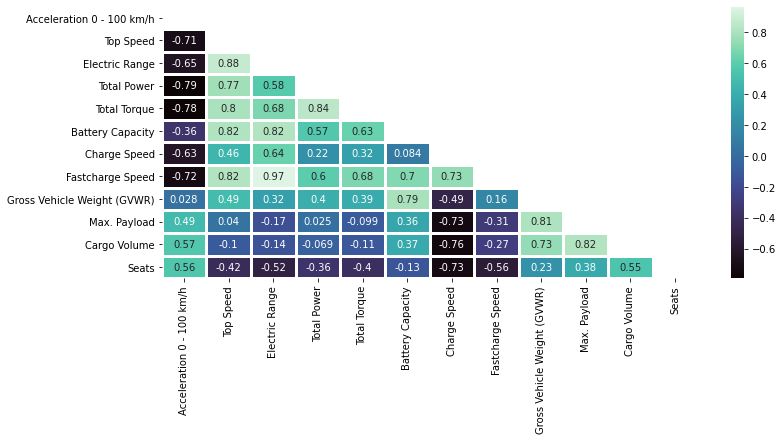

In [10]:
plt.figure(figsize=(12,5))
Mercedes_correlation_matrix = ev_Mercedes[['Make','Acceleration 0 - 100 km/h', 'Top Speed', 'Electric Range', 'Total Power', 'Total Torque', 'Battery Capacity', 'Charge Speed', 'Fastcharge Speed', 'Gross Vehicle Weight (GVWR)','Max. Payload', 'Cargo Volume','Seats']].corr()
matrix = np.triu(Mercedes_correlation_matrix)
sns.heatmap(data=Mercedes_correlation_matrix ,cmap='mako', annot=True, mask=matrix,linewidths=3)
plt.show()

## comparison between Mercedes to the entire population

### Comparison based on the Electric Range and the Fastcharge Speed properties

<AxesSubplot:xlabel='Fastcharge Speed', ylabel='Electric Range'>

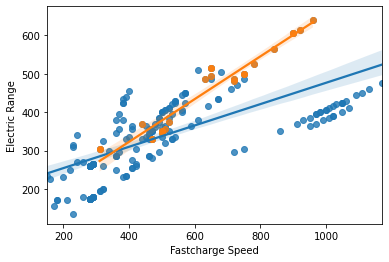

In [11]:
sns.regplot(x = 'Fastcharge Speed', y = 'Electric Range', order = 1, data=ev_data)
sns.regplot(x = 'Fastcharge Speed', y = 'Electric Range', order = 1, data=ev_Mercedes)

#### The plot shows that Mercedes has put less effort into making charge speed faster as the range increases.

### Comparison based on the Charge Speed and the Cargo Volume properties

<AxesSubplot:xlabel='Charge Speed', ylabel='Cargo Volume'>

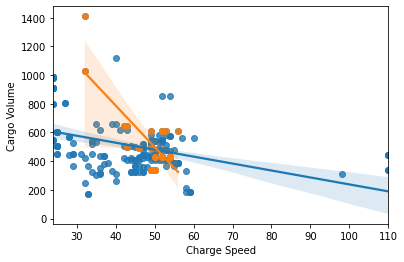

In [12]:
sns.regplot(x = 'Charge Speed', y = 'Cargo Volume', order = 1, data=ev_data)
sns.regplot(x = 'Charge Speed', y = 'Cargo Volume', order = 1, data=ev_Mercedes)

#### The plot shows a general pattern in the population that there is no a strong correlation between the Carge Speed and the Cargo Volume, while in the Mercedes brand the larger the Cargo Volume is, the Charge Speed is faster.

please let me know how you find this work on my Linkedin account - https://www.linkedin.com/in/uriya-sela/

Thank you!